# 7. Priprava podatkov za strojno učenje

(pripravil Gjorgji Noveski, IJS, Slovenija)

V tem poglavju bomo izvajali različne operacije s podatki, da jih pripravimo za algoritme strojnega učenja.

Za začetek moramo uvoziti nekaj paketov, ki nam bodo pomagali pri pripravi podatkov. Ti paketi ali knjižnice, kot jim pravimo, so:
- pandas - za delo s tabelaričnimi podatki
- numpy - za matematične operacije
- sklearn - za algoritme strojnega učenja in druge priročne funkcije
- cv2 - za delo s slikami
- matplotlib - za prikazovanje diagramov in grafov

In [ ]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn import svm

Naložimo zbirko podatkov in izpišemo prvih 5 vrstic, da vidimo, katere značilnosti imajo. To je le za predstavo o tem, s čim se ukvarjamo.

In [ ]:
dataset = pd.read_csv('https://raw.githubusercontent.com/VALENCEML/eBOOK/main/EN/07/sample_dataset.txt')
dataset.head()

,Full name,age,sex,height,school,average grade
0,Roberta Guzman,14,f,150,High school Charles,3.5
1,Christina Griffith,14,f,166,High school Charles,3.3
2,Harvey Aguilar,15,m,152,High school Charles,2.0
3,Vicky Mack,18,f,158,High school Charles,2.5
4,Kelley Freeman,18,f,167,High school Charles,4.5


Zbirko podatkov lahko analiziramo, da ugotovimo, koliko različnih srednjih šol je omenjenih v njej.

In [ ]:
nm_of_schools = len(dataset['school'].unique())
print(f"V zbirki imamo {nm_of_schools} šoli so:")
for school in dataset['school'].unique():
    print(school)

V zbirki imamo 2 šoli so:
High school Charles
High school Wimble


## 7.1. Izvajanje ročnih opomb na preprostem naboru podatkov (ustvarjenem v učilnici).

V tej zbirki podatkov so za vsakega učenca podatki, kot so: njegovo ime, starost, spol, višina v centimetrih, katero srednjo šolo obiskuje in njegova povprečna ocena (1 je najnižja, 5 je najvišja). Recimo, da smo na primer profesor in želimo imeti še več informacij iz tega nabora podatkov. V tem primeru bi bil eden od pristopov dodajanje informacij o tem, ali bo dijak glede na svojo povprečno oceno opravil izpit ali ne. V nabor podatkov lahko ročno dodamo še en stolpec, ki se bo imenoval "Je opravil" in bo vseboval vrednosti "da" ali "ne", predstavljene kot enice in ničle.

In [ ]:
dataset['has passed'] = np.empty(len(dataset), dtype=str)
dataset['has passed'] = np.where(dataset['average grade'] >= 3.5, 1, 0)

In [ ]:
dataset.head()

,Full name,age,sex,height,school,average grade,has passed
0,Roberta Guzman,14,f,150,High school Charles,3.5,1
1,Christina Griffith,14,f,166,High school Charles,3.3,0
2,Harvey Aguilar,15,m,152,High school Charles,2.0,0
3,Vicky Mack,18,f,158,High school Charles,2.5,0
4,Kelley Freeman,18,f,167,High school Charles,4.5,1


Zdaj lahko vidimo, da ima naš nabor podatkov dodaten stolpec z imenom "has passed". V prihodnosti lahko dodamo dodatne stolpce, odvisno od tega, kaj bomo morali storiti.

## 7.2. Eksperimentiranje z ekstrakcijo atributov

Ekstrakcija atributov je naloga pretvorbe atributov, ki jih že imamo v naši zbirki podatkov, v značilnosti, ki bodo primerne za uporabo algoritmov strojnega učenja. Ker so algoritmi zasnovani tako, da bolje obdelujejo podatke, ki so v številčni obliki, bo naša naslednja postaja pri tem pridobivanju značilnosti prav to, da naše podatke pretvorimo v nekaj številčnega.

Najprej naš nabor podatkov uredimo v pythonov slovar. To storimo, ker metoda, ki bo naše lastnosti pretvorila v numerične lastnosti, sprejema slovarje.

In [ ]:
dataset_as_dictionary = []
for index, row in dataset.iterrows():
    row_dict = {}
    row_dict['Full name'] = row['Full name']
    row_dict['age'] = row['age']
    row_dict['sex'] = row['sex']
    row_dict['height'] = row['height']
    row_dict['school'] = row['school']
    row_dict['average grade'] = row['average grade']
    row_dict['has passed'] = row['has passed']
    dataset_as_dictionary.append(row_dict)

Za dosego našega cilja, tj. pridobivanja številskih značilnosti, uporabljamo razred **DictVectorizer** iz knjižnice sklearn. Ustvarimo primerek tega razreda in pokličemo metodo **fit_transform()**, ki bo analizirala podatke in jih ustrezno pretvorila v številke.

In [ ]:
vect = DictVectorizer()
vect.fit_transform(dataset_as_dictionary).toarray()

array([[  0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
          0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
          1. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,  14. ,   3.5,
          1. , 150. ,   1. ,   0. ,   1. ,   0. ],
       [  0. ,   0. ,   1. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
          0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
          0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,  14. ,   3.3,
          0. , 166. ,   1. ,   0. ,   1. ,   0. ],
       [  0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   1. ,
          0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
          0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,  15. ,   2. ,
          0. , 152. ,   1. ,   0. ,   0. ,   1. ],
       [  0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
          0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
          0. ,   0. ,   0. ,   0. ,   0. ,   1. ,   0. ,  18. ,   

Vidimo, da so funkcije namesto v nizu pretvorjene v številčno predstavitev.

## 7.3. Razdelitev podatkov na učno in testno množico

Pomemben korak pri izdelavi modelov strojnega učenja je razdelitev podatkov na nabor podatkov za učenje in nabor podatkov za testiranje.
To storimo zato, ker če model strojnega učenja usposabljamo in testiramo na istem naboru podatkov, nam rezultati ne bodo povedali, kako dobro se bo naš model obnesel, ko bo predstavljen z novimi in nevidenimi podatki. Rešitev je torej razdelitev nabora podatkov na nabor podatkov za učenje in nabor podatkov za testiranje. Kot pove že ime, bomo enega uporabili samo v učnem delu modela, medtem ko bomo svoje metrike in domneve o modelu dobili, ko ga bomo zagnali na testnem naboru podatkov.

Za naš majhen nabor podatkov je mogoče nabor podatkov ročno razdeliti na učnii in testni nabor podatkov. Ko pa bomo delali z velikimi nabori podatkov, bo to postalo neizvedljivo. Za samodejno razdelitev podatkovne množice lahko uporabimo koristne funkcije, ki nam jih ponuja knjižnica sklearn, in sicer funkcijo **train_test_split()**. Ker modeli strojnega učenja kot vhodne podatke potrebujejo podatke in napovedujejo neko ciljno spremenljivko, moramo funkciji posredovati iste podatke.

V našem scenariju želimo predvideti, ali je učenec prejel pozitivno oceno. Vhodni podatki, ki jih bomo posredovali modelu strojnega učenja, bodo splošne informacije o študentih, pri čemer ne bomo upoštevali njihove povprečne ocene. Tudi v tem primeru samo podatke, ki jih potrebujemo kot vhodne podatke za model, pretvorimo v slovarje, ki jih bomo uporabili za ekstrakcijo značilnosti.

In [ ]:
# FOR X
x_data_as_dictionary = []
for index, row in dataset.iterrows():
    row_dict = {}
    row_dict['Full name'] = row['Full name']
    row_dict['age'] = row['age']
    row_dict['sex'] = row['sex']
    row_dict['height'] = row['height']
    row_dict['school'] = row['school']
    
    x_data_as_dictionary.append(row_dict)

Pri ciljni spremenljivki nam ni treba izločati lastnosti, lahko jo uporabimo takšno, kot je. Naša ciljna spremenljivka je stolpec "has passed" iz našega nabora podatkov.

In [ ]:
vect = DictVectorizer()
x = vect.fit_transform(x_data_as_dictionary).toarray()
y = dataset.iloc[:, -1]

Nabor podatkov smo razdelili na 4 dele:
- x_train je vhodni podatek za model med učenjem.
- y_train je ciljna spremenljivka, ki bo uporabljena med učenjem modela.

- x_test je vhodni podatek za model, ko želimo narediti napoved ali izračunati, kako dobro deluje naš model.
- y_test je ciljna spremenljivka, s katero preverimo, ali je imel naš model prav, ko napoveduje.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

S pomočjo knjižnice sklearn ustvarimo primerek **metode podpornih vektorjev**. V funkciji **fit()** ji posredujemo podatke, ki jih potrebuje med učenjem.

In [ ]:
MLModel = svm.SVC()
MLModel.fit(x_train, y_train)

SVC()

Na koncu smo naredili napoved o podatkih, ki jih imamo v naboru podatkov za testiranje, pri čemer je vsak element predstavljal, ali je učenec opravil test ali ne.

In [ ]:
MLModel.predict(x_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1])

## 7.4. Uporaba razširitve podatkov

Najpogostejši primer uporabe za razširitev podatkov so slike. Nekateri modeli strojnega učenja so zasnovani tako, da kot vhodni podatek sprejemajo slike. Slike so predstavljene kot tridimenzionalna polja, pri čemer je ena dimenzija širina, druga višina, tretja pa barva (rdeča, zelena, modra). Vrednosti polj širine in višine predstavljajo intenzivnost pikslov določene barve.

Nekatere oblike povečanja podatkov v slikah so lahko precej preproste. Na primer:
- vodoravno obračanje
- obračanje navpično
- povečava
- vrtenje
- itd.

V naslednjem primeru bomo videli, kako lahko naložimo preprosto sliko in jo nekoliko obrnemo.

In [ ]:
from skimage import io 
image = io.imread('https://github.com/VALENCEML/eBOOK/raw/main/EN/07/flower.jpg')
augmented_image = cv2.flip(image, 1)

(-0.5, 1279.5, 959.5, -0.5)

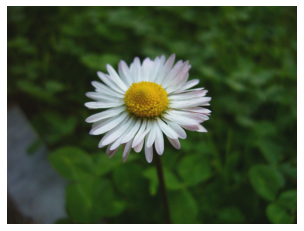

In [ ]:
plt.imshow(image)
plt.axis('off')

(-0.5, 1279.5, 959.5, -0.5)

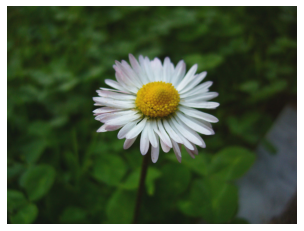

In [ ]:
plt.imshow(augmented_image)
plt.axis('off')